In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

%matplotlib inline

In [3]:
def lfun(xvals,jj,x):
    lval = np.ones(x.size)
    xjj = xvals[jj]
    xrem = xvals[:jj]
    xrem = np.append(xrem,xvals[jj+1:])
    denom = np.prod(xjj - xrem)
    for val in xrem:
        lval *= (x-val)
    return lval/denom

def lagran_interp(xvals,fvals,x):
    n = fvals.size
    ipoly = np.zeros(x.size)
    for jj in range(n):
        ipoly += fvals[jj]*lfun(xvals,jj,x)
    return ipoly

**Problem 1**: 10 pts - For the function

$$
f(x) = \frac{x^{2}}{1+x^{4}}, ~ -1 \leq x \leq 1
$$

a) (2pts) Using an equispaced set of $10$ nodes, generate the Lagrange interpolating polynomial to $f(x)$.  Generate a plot which shows how the error in your approximation varies over the interval.  

b) (2pts) Using an equispaced set of $20$ nodes, generate the Lagrange interpolating polynomial to $f(x)$.  Generate a plot which shows how the error in your approximation varies over the interval.  

c) (2pts) At what number of equispaced nodes does your Lagrange interpolation approximation break down?  

d) (4pts) Does using Chebyshev points help resolve the issues you saw in c) ?  Provide examples to verify your claim.

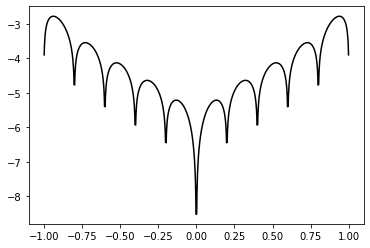

In [4]:
#1a
xfine = np.linspace(-1.,1.,int(1e3)+1)
ftrue = xfine**2./(1.+xfine**4.)
xvals = xfine[::100]
fvals = ftrue[::100]
finterp = lagran_interp(xvals,fvals,xfine)
plt.plot(xfine,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

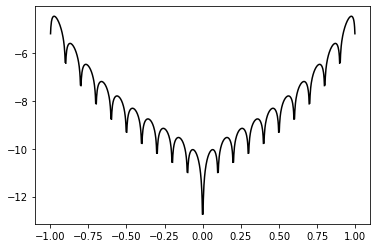

In [5]:
#1b
xfine = np.linspace(-1.,1.,int(1e3)+1)
ftrue = xfine**2./(1.+xfine**4.)
xvals = xfine[::50]
fvals = ftrue[::50]
finterp = lagran_interp(xvals,fvals,xfine)
plt.plot(xfine,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

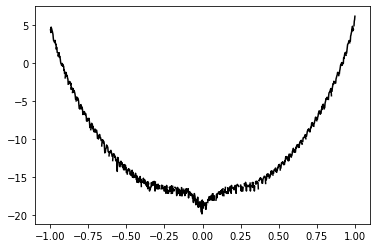

In [6]:
#1c
xfine = np.linspace(-1.,1.,int(1e3)+1)
ftrue = xfine**2./(1.+xfine**4.)
xvals = xfine[::12]
fvals = ftrue[::12]
finterp = lagran_interp(xvals,fvals,xfine)
plt.plot(xfine,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

It breaks down at about 80-90 nodes.

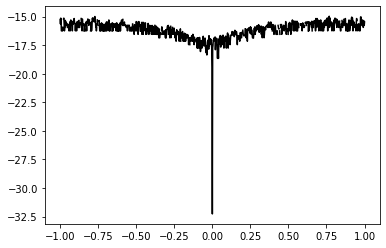

In [7]:
#1d
ncheb = 80
xcheb = np.cos(np.pi*(2.*np.arange(0, ncheb + 1) + 1.)/(2.*ncheb + 2.))
fcheb = xcheb**2./(1. + xcheb**4.)
finterp = lagran_interp(xcheb,fcheb,xfine)
plt.plot(xfine,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

Chebyshev points does help since the error interval has drastically decrease from $[10^{5}, 10^{-20}] $ to $[10^{-15}, 10^{-32.5}] $

**Problem 2**: 10 pts - For the basis functions of Lagrange interpolation, $L^{(n)}_{j}(x)$, where 

$$
L^{(n)}_{j}(x) = \prod_{l=0, ~l\neq j}^{n}\frac{(x-x_{l})}{(x_{j}-x_{l})}
$$

a) (3pts) Show that 

$$
\frac{d}{dx} L^{(n)}_{j}(x) = \frac{1}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}~\sum_{l=0,~l\neq j}^{n}~ \prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x-x_{m})
$$

b) (2pts) From this, find that 

$$
\frac{d}{dx} L^{(n)}_{j}(x_{k}) = \left\{ \begin{array}{rl} \sum_{l=0, ~ l\neq j}^{n}\frac{1}{x_{j}-x_{l}} & k=j \\
& \\
\frac{\prod_{m=0,~m\neq j,~m\neq k}^{n} (x_{k}-x_{m})}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})} & k\neq j
\end{array}\right.
$$

c) (2pts) If we suppose the Lagrange polynomial $P_{n}(x)$ is given by 

$$
P_{n}(x) = \sum_{j=0}^{n}f_{j}L^{(n)}_{j}(x),
$$

so that $P_{n}(x)\approx f(x)$, $f_{j}=f(x_{j})$, provide a brief explanation of how the formulas in part (b) allow you to generate finite-difference approximations to $f'(x_{j})$ for any number of points with any type of interpoint spacing.  

d) (3pts) Given the data $\left\{x_{j-1},f_{j-1},x_{j},f_{j},x_{j+1},f_{j+1},x_{j+2},f_{j+2}\right\}$, where 

$$
\delta x = x_{j}-x_{j-1}=x_{j+1}-x_{j}=x_{j+2}-x_{j+1} 
$$ 

derive the _forward-difference approximation_ to $f'(x_{j})\approx P_{2}'(x_{j})$ where

$$
P_{2}(x) = f_{j}L^{(2)}_{j}(x) + f_{j+1}L^{(2)}_{j+1}(x) + f_{j+2}L^{(2)}_{j+2}(x).
$$

How does your forward-difference approximation to $f'(x_{j})$ differ from the centered-difference approximation to $f'(x_{j})$ given by 

$$
f'(x_{j}) \approx \frac{1}{2\delta x}\left(f_{j+1} - f_{j-1}\right).
$$

When might you use one or the other?

2a)
$$
L^{(n)}_{j}(x) = \prod_{l=0, ~l\neq j}^{n}\frac{(x-x_{l})}{(x_{j}-x_{l})}
$$

We see that $(x_{j}-x_{l})$ is constant. Thus, we have

$$
L^{(n)}_{j}(x) = \prod_{l=0, ~l\neq j}^{n}\frac{1}{(x_{j}-x_{l})} \prod_{l=0, ~l\neq j}^{n}(x-x_{l})
$$

Implememnting product rule we can get that: 

$$
\frac{1}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}~\sum_{l=0,~l\neq j}^{n}~ \prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x-x_{m})
$$

2b)

We can write our derivative as 

$$
\sum_{l=0,~l\neq j}^{n}\frac{\prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x_{k}-x_{m})}{\prod_{m=0,~m\neq j}^{n}(x_{j}-x_{m})} $$

When $x_{j} = x_{k}$, our numerator cancels out excpet for our m=l in our denominator:

$$
\sum_{l=0,~l\neq j}^{n}\frac{1}{(x_{j}-x_{l})} 
$$

But, when $~x_{j}$ does not equal $x_{k}$, our terms

$$
\sum_{l=0,~l\neq j}^{n} \prod_{m=0, ~m\neq l, ~ m\neq j}^{n} (x_{k} - x_{m})
$$

Everything goes to 0 excpet for when l=k. Then, we see that we will have one non-zero term left in our sum. This is when m is not equal to k. 

Then, we have that our function is 

$$
\frac{\prod_{m=0,~m\neq k, ~ m\neq j}^{n}(x_{k}-x_{m})}{\prod_{l=0,~l\neq j}^{n}(x_{j}-x_{l})}
$$

2c)
Since $f_{j} = f(x_{j})$ and $f_{j}^{'} = f^{'}(x_{j})$, the formulas derived above can be used since we must incorporate product rule when differentiating. This will allow us to find approximations for any number of points.

2d)

**Problem 3**: 10 pts - Suppose I give you the data $\left\{x_{j},f_{j},s_{j}\right\}_{j=0}^{n}$, where I want to find a polynomial of degree $m$, say $P_{m}(x)$, where

$$
P_{m}(x) = \sum_{l=0}^{m}p_{l}x^{l} = p_{0} + p_{1}x + \cdots + p_{m}x^{m}, 
$$

such that 

$$
P_{m}(x_{j}) = f_{j}, ~ P'_{m}(x_{j}) = s_{j}, ~ j=0,\cdots, n.
$$

Thus, if we want $P_{m}(x)\approx f(x)$, we ask not only that $P_{m}(x)$ interpolate $f(x)$ at $x_{j}$ so that $f(x_{j})=P_{m}(x_{j}) = f_{j}$, we also require that we match the slopes so that $f'(x_{j}) = P_{m}'(x_{j}) = s_{j}$.  This approximation is called _Hermite Interpolation_.

a) (1pt) How many equations do I need to solve in this interpolation problem?  What degree of polynomial do I need to choose in order to find a unique solution to my interpolation problem?

b) (2pts) Suppose we set our approximating polynomial $P_{2n+1}(x)$ to be 

$$
P_{2n+1}(x) = \sum_{l=0}^{n}f_{l}H_{l,n}(x) + \sum_{l=0}^{n}s_{l}\tilde{H}_{l,n}(x), 
$$

where the degree of the polynomials $H_{l,n}(x)$ and $\tilde{H}_{l,n}(x)$ are $2n+1$.  Show that we need these polynomials to satisfy the requirements

$$
H_{l,n}(x_{k}) = \delta_{kl}, ~ H'_{l,n}(x_{k}) = 0, ~ \tilde{H}_{l,n}(x_{k}) = 0, ~ \tilde{H}'_{l,n}(x_{k}) = \delta_{kl},
$$

where 

$$
\delta_{kl} = \left\{\begin{array}{rl} 1 & k=l \\ 0 & k\neq l\end{array} \right.
$$

c) (3pts) Show the formulas 

$$
H_{l,n}(x) = \left(1 - 2(x-x_{l})\frac{d}{dx}L^{(n)}_{l}(x_{l}) \right)\left( L^{(n)}_{l}(x) \right)^{2},
$$

$$
\tilde{H}_{l,n}(x) = \left( x-x_{l} \right)\left( L^{(n)}_{l}(x) \right)^{2},
$$

satisfy the necessary requirements from part (b).  

d) Implement Hermite Interpolation using the results from above, including from Problem 2. For the test function 
$$
f(x) = \frac{1}{1+x^{2}}, ~ -1\leq x \leq 1,
$$
develop three test cases which show the accuracy of your method.  Over equispaced interpolation data are you able to avoid the Runge-Phenomenon that we see for standard equispaced Lagrage interpolation?

3a) 

Since we want $P_{m}(x)\approx f(x)$ and $f'(x_{j}) = P_{m}'(x_{j}) = s_{j}$, we must choose a polynomial with the same degree as $f(x)$.

3b)
$
P_{m}(x_{j}) = f_{j}, ~ P'_{m}(x_{j}) = s_{j}$ 

So:


$
\begin{align}
P_{m}(x_{j}) = & \sum_{l=0}^{n}f_{l}H_{l,n}(x_{j}) + \sum_{l=0}^{n}s_{l}\tilde{H}_{l,n}(x_{j}) \\
= & f_{j}, \ if \ \tilde{H}_{l,n}(x_{j}) = 0, \ H_{l,n}(x_{j}) = \delta_{kl} \\
\end{align}
$


$
\begin{align}
P'_{m}(x_{j}) = & \frac{d}{dx}(\sum_{l=0}^{n}f_{l}H_{l,n}(x_{j}) + \sum_{l=0}^{n}s_{l}\tilde{H}_{l,n}(x_{j})) \\
= & \sum_{l=0}^{n}f_{l}\frac{d}{dx}H_{l,n}(x_{j}) + \sum_{l=0}^{n}s_{l}\frac{d}{dx}\tilde{H}_{l,n}(x_{j})\\
= & s_{j}, \ if \ H'_{l,n}(x_{k}) = 0 \ and \ \tilde{H}'_{l,n}(x_{k}) = \delta_{kl}\\
\end{align}
$



In [8]:


def lfun(xvals,j,x):
    lval = np.ones(x.size)
    xj = xvals[j]
    xrem = xvals[0:j]
    xrem = np.append(xrem,[xvals[j+1:]])
    denom = np.prod(xj - xrem)
    num = lval
    for l in xrem:
        num *= (x-l)
    return num/denom

def H_interp(xvals,fvals,x):
    n = fvals.size
    ipoly = np.zeros(x.size)
    for j in range(n):
        ipoly += fvals[j] * lfun(xvals,j,x)
    return ipoly

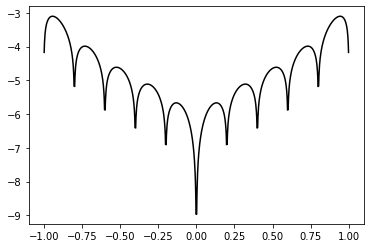

In [9]:
xfine = np.linspace(-1.,1.,int(1e3)+1)
ftrue = 1./(1.+xfine**2.)
xvals = xfine[::100]
fvals = ftrue[::100]
finterp = lagran_interp(xvals,fvals,xfine)
plt.plot(xfine,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')